# LAB 3


## NAME - HIMANSHU
## ROLL - 16MA20020

<br/><br/>

## THEORY



In some applications, such as solving ODE-BVP / PDE using orthogonal collocations on finite elements,
we encounter equations with a block diagonal matrices.

$$AX = D$$

$$
\begin{bmatrix}
    b_1  &c_1  &0    &0  \dots   & 0 \\
    a_1  &b_1  &c_1  &0  \dots   & 0 \\
    &\vdots && \dots & \vdots \\
    0    &0    &0    &0  \dots   &b_n
\end{bmatrix}
$$

where each element of A is a matrix and each elements of X and D are vectors with dimension equal to number of columns in one matrix element of A.


It can also be solved using thomas algorithm using matrix inverse and matrix multiplication in place of regular multiplication and division.



## Question

$$y'' +4y'' + y' - 6y = 1 $$

wrt: 
$$y(0) = 0$$
$$y'(0) = 0$$
$$ y'(1) = 1 $$

In [4]:
import numpy as np
import pandas as pd

In [7]:
x1 = 0
x2 = 1
y1_ = 0
y2_ = 1
h = 1/3

In [18]:
int((x2-x1)/h)

3

In [68]:
def thomas_(a,b,c,d):
    c_ = np.zeros(c.shape)
    d_ = np.zeros(d.shape)

    c_[0] = np.dot(np.linalg.inv(b[0]), c[0] )
    d_[0] = np.dot(np.linalg.inv(b[0]), d[0] )

    for i in range(1, c.shape[0]-1):
        c_[i] = np.dot( np.linalg.inv(b[i] - np.dot(a[i], c_[i-1])), c[i] )

    for i in range(1, d.shape[0]):
        d_[i] = np.dot( np.linalg.inv(b[i] - np.dot(a[i], c_[i-1])), d[i] - np.dot(a[i], d_[i-1]) )

    return [c_, d_]


def main_(h=1/3):
    n = int((x2-x1)/h) +1 

    a = np.zeros((n-1,2,2))
    b = np.zeros((n-1,2,2))
    c = np.zeros((n-1,2,2))
    d = np.zeros((n-1,2))
    x_f = np.zeros((n-1)) 
    
    
    for i in range(0, n-1):
        x_f[i] = x1+(1+i)*h
        a[i][0][0] = -1
        a[i][0][1] = -1*h/2
        a[i][1][0] = 0
        a[i][1][1] = 1/(h*h) - 2/h

    for i in range(0, n-1):
        b[i][0][0] = 1
        b[i][0][1] = -1*h/2
        b[i][1][0] = -6
        b[i][1][1] = -2/(h*h) + 1

    for i in range(0, n-1):
        c[i][0][0] = 0
        c[i][0][1] = 0
        c[i][1][0] = 0
        c[i][1][1] = 1/(h*h) + 2/h
        
        
    d[0][0] = 0
    d[0][1] = 1
        
    for i in range(1,n-2):
        d[i][0] = 0
        d[i][1] = 1
        
        
    d[-1] = np.array([0, 1]) - np.dot(c[-1], np.array([0, 1]))

    c_,d_ = thomas_(a,b,c,d)
    
    res = np.zeros((n-1,2))

    res[-1] = d_[-1]
    for i in range(n-2):
        res[n-3-i] = d_[n-3-i] - np.dot(c_[n-3-i], res[n-2-i])
        
    return [res[:,0], x_f]

In [71]:
a_1, x_1 = main_(1/3)
a_2, x_2 = main_(0.1)
a_3, x_3 = main_(0.05)
#a_4, x_4 = main_(0.1)

In [80]:
import pandas as pd
print(pd.DataFrame(np.column_stack((x_1, a_1)), columns=["x", "predicted"]))
print()
print(pd.DataFrame(np.column_stack((x_2, a_2)), columns=["x", "predicted"]))
print()
print(pd.DataFrame(np.column_stack((x_3, a_3)), columns=["x", "predicted"]))

          x  predicted
0  0.333333   0.074626
1  0.666667   0.249913
2  1.000000   0.477505

     x  predicted
0  0.1   0.011152
1  0.2   0.041242
2  0.3   0.084671
3  0.4   0.137779
4  0.5   0.198286
5  0.6   0.264896
6  0.7   0.337010
7  0.8   0.414531
8  0.9   0.497722
9  1.0   0.587115

       x  predicted
0   0.05   0.003159
1   0.10   0.012111
2   0.15   0.025902
3   0.20   0.043747
4   0.25   0.065007
5   0.30   0.089161
6   0.35   0.115797
7   0.40   0.144584
8   0.45   0.175270
9   0.50   0.207662
10  0.55   0.241620
11  0.60   0.277049
12  0.65   0.313891
13  0.70   0.352122
14  0.75   0.391742
15  0.80   0.432776
16  0.85   0.475268
17  0.90   0.519280
18  0.95   0.564888
19  1.00   0.612182


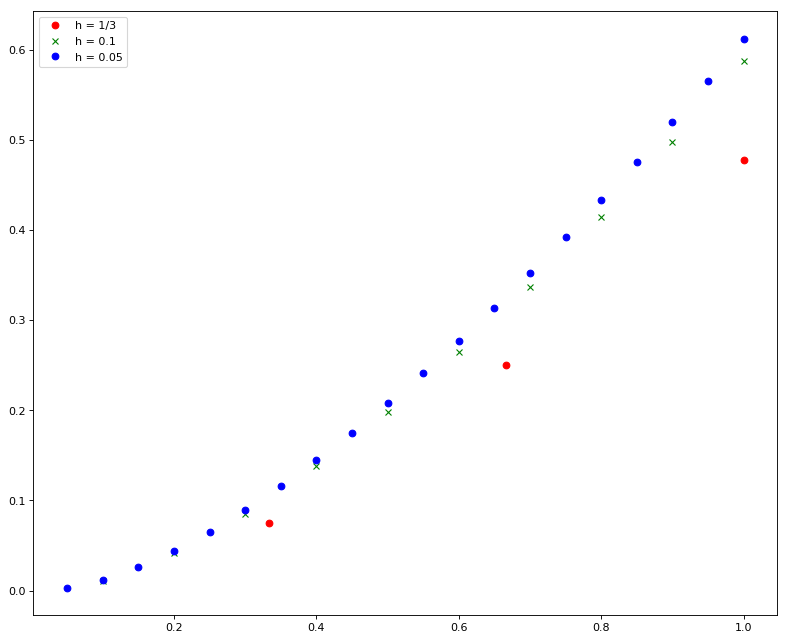

In [82]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_1, a_1, 'ro', label = 'h = 1/3')
plt.plot(x_2, (a_2),  'gx', label = 'h = 0.1')
plt.plot(x_3, (a_3),  'bo', label = 'h = 0.05')
#plt.plot(x_4, (a_4), 'yo', label = 'h = 0.1')
plt.legend(loc='best')
plt.show()